<a href="https://colab.research.google.com/github/naresh1219990/EGG-fertility/blob/colab_naresh/Copy_of_Egg_Fertility_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Data

Visualize the Data

In [ ]:
!unzip Testing
!unzip Training

Archive:  Training.zip
replace Training/FERTILE/.b.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Populating the interactive namespace from numpy and matplotlib


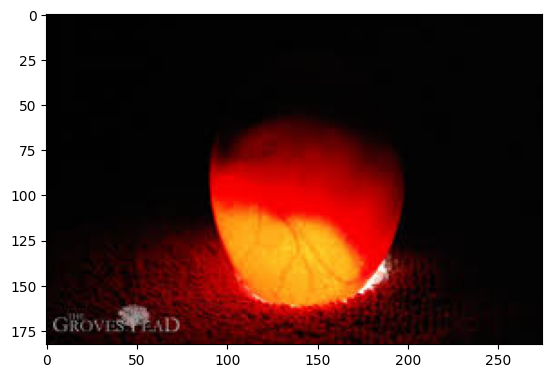

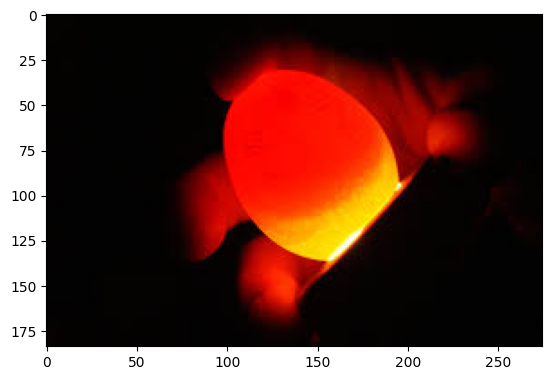

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('image path')
impplot=plt.imshow(img)
plt.show()
img=mpimg.imread('enter image path')
impplot=plt.imshow(img)
plt.show()

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Checking the version of Tensorflow

In [ ]:
print(tensorflow.__version__)

2.15.0


Designing the Model

In [ ]:
img_width,img_height=150,150
train_data_dir=r"/content/Training"
validation_data_dir=r"/content/Testing"
nb_train_sample=3
nb_validation_sample=3
epochs=100
batch_size=10

Checking the shape of the image

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)

Generate Images to train the Model

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height)
                                                  ,batch_size=batch_size,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height)
                                                      ,batch_size=batch_size,class_mode='binary')

Found 129 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


Visual Representation of ImageDataGenerator

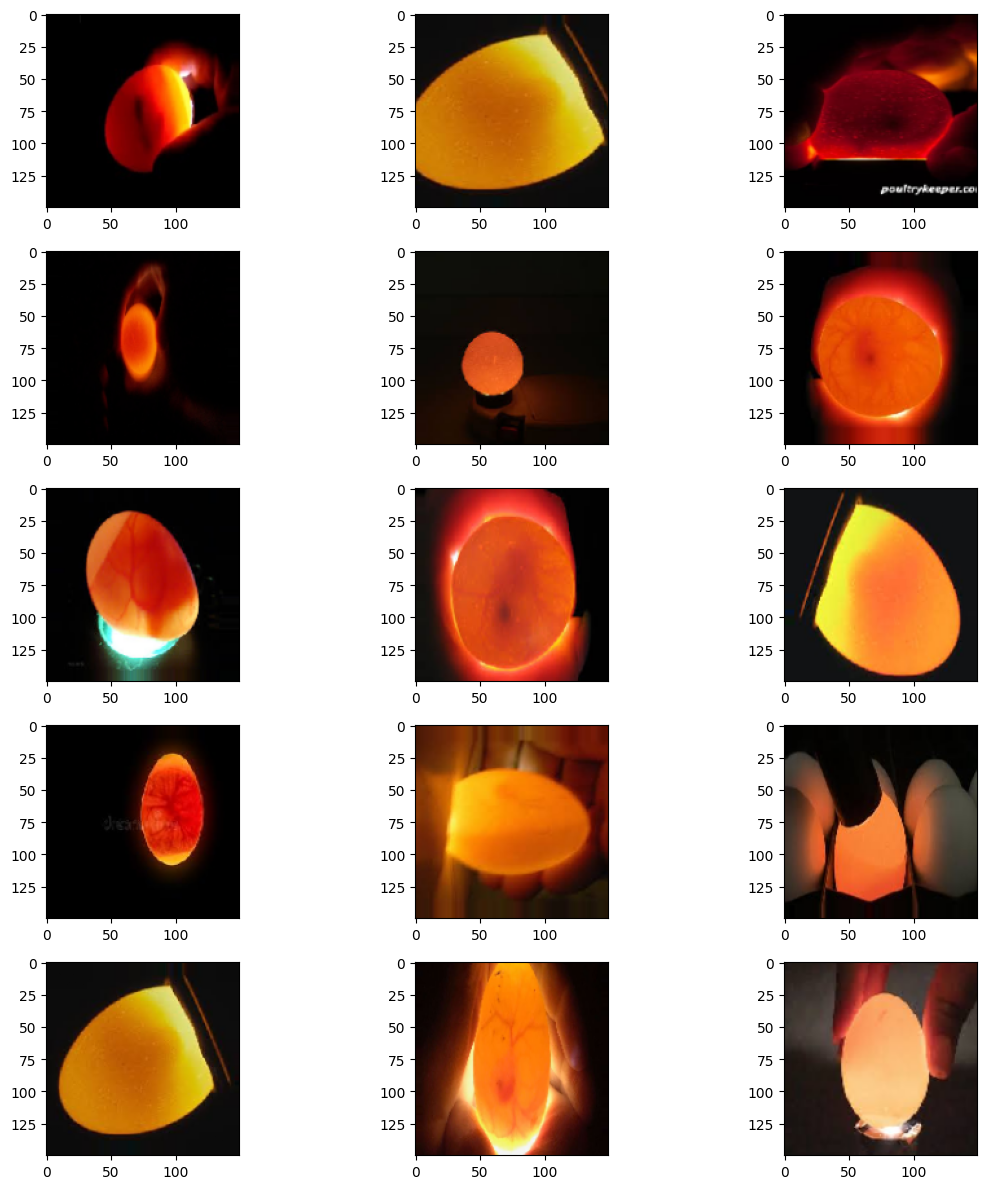

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for x_batch,y_batch in train_generator:
    image=x_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [ ]:
model= Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 activation_1 (Activation)   (None, 74, 74, 64)        0         
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 activation_1 (Activation)   (None, 74, 74, 64)        0         
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                        

In [ ]:
training= model.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,verbose=1)

Epoch 1/100


<ipython-input-15-d250f9f23b4d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training= model.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,verbose=1)


3/3 [==============================] - 4s 309ms/step - loss: 6.2898 - accuracy: 0.6000 - val_loss: 11.5075 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 116ms/step - loss: 8.8760 - accuracy: 0.3000 - val_loss: 6.2961 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 148ms/step - loss: 2.6560 - accuracy: 0.6667 - val_loss: 0.8106 - val_accuracy: 0.7647
Epoch 4/100
3/3 [==============================] - 0s 117ms/step - loss: 2.4571 - accuracy: 0.4667 - val_loss: 0.6325 - val_accuracy: 0.7059
Epoch 5/100
3/3 [==============================] - 0s 117ms/step - loss: 1.0699 - accuracy: 0.6333 - val_loss: 0.7525 - val_accuracy: 0.6765
Epoch 6/100
3/3 [==============================] - 0s 203ms/step - loss: 0.8024 - accuracy: 0.7241 - val_loss: 0.7647 - val_accuracy: 0.7059
Epoch 7/100
3/3 [==============================] - 0s 111ms/step - loss: 0.7648 - accuracy: 0.7667 - val_loss: 0.7367 - val_accuracy: 0.7059
Epoch 8/100
3/3 [=======

1/1 [==============================] - 0s 367ms/step
[[1.]]
Our model says : Fertile


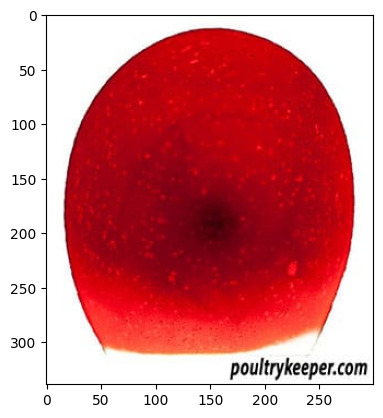

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred=image.load_img("/content/Training/INFERTILE/Candling-Eggs8.jpg",target_size=(150,150))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
result=model.predict(img_pred)
print(result)
if result[0][0]==1:
  prediction="Fertile"
else:
  prediction="InFertile"
print('Our model says :',prediction)

img=mpimg.imread('/content/Training/FERTILE/Candling-Fertile-Egg-Day-7_380-1.jpg')
imgplot=plt.imshow(img)
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


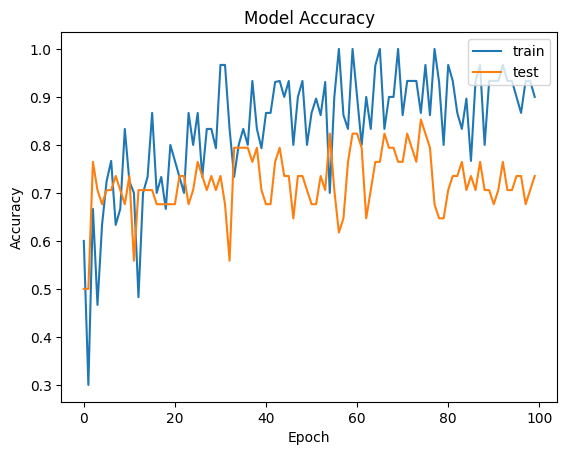

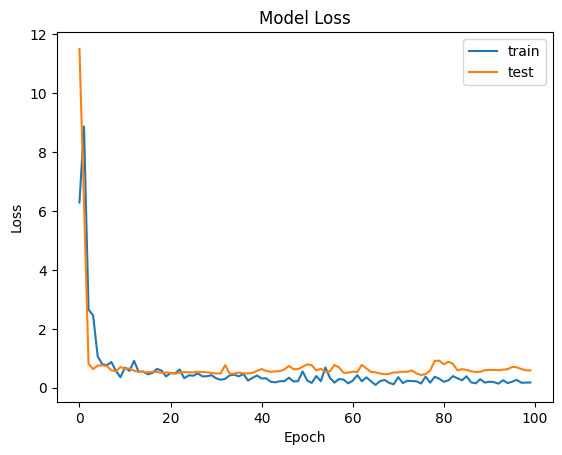

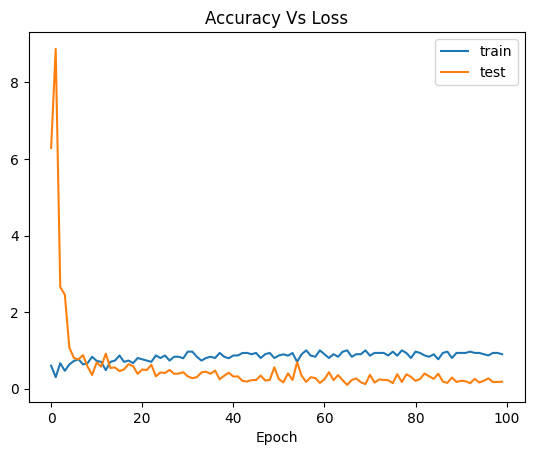

In [ ]:
import matplotlib.pyplot as plt
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()
plt.plot(training.history['accuracy'])
plt.plot(training.history['loss'])
plt.title('Accuracy Vs Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
y
